## Part 1 - Data Analysis and Bayes Nets

### 1) Data Visualization and Exploration

Importing the required libraries and checking for the python version.

In [1]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3,5)

In [2]:
# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

In [3]:
# Common imports
import numpy as np
import pandas as pd
import os
import cv2  # OpenCV Python library for computer vision

# to make this notebook's output stable across runs
np.random.seed(42)

In [4]:
# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

In [5]:
import seaborn as sns

In [6]:
import random

Loading only the training set for Part 1 of the coursework

In [7]:
CW_DATASET_PATH = "CW_dataset"

def load_train_data(dataset_path=CW_DATASET_PATH):
    x_train_all_path = os.path.join(dataset_path, "x_train_all.csv")
    y_train_all_path = os.path.join(dataset_path, "y_train_all.csv")
    x_test_all_path = os.path.join(dataset_path, "x_test_all.csv")
    y_test_all_path = os.path.join(dataset_path, "y_test_all.csv")

    x_train_all = pd.read_csv(x_train_all_path)
    y_train_all = pd.read_csv(y_train_all_path)
    x_test_all = pd.read_csv(x_test_all_path)
    y_test_all = pd.read_csv(y_test_all_path)

    return x_train_all, y_train_all, x_test_all,y_test_all

In [8]:
x_train, y_train, x_test, y_test = load_train_data()

Analysing the dataset

In [9]:
#Checking the shape of the data
x_train.shape

(9690, 2304)

In [10]:
y_train.shape

(9690, 1)

In [11]:
#Displaying the first 5 rows of the dataset
x_train.head()

,0,1,2,3,4,5,6,7,8,9,...,2294,2295,2296,2297,2298,2299,2300,2301,2302,2303
0,78.0,77.0,76.0,82.0,87.0,92.0,104.0,119.0,117.0,120.0,...,87.0,79.0,72.0,76.0,83.0,95.0,99.0,98.0,95.0,94.0
1,73.0,75.0,79.0,78.0,76.0,75.0,89.0,107.0,133.0,125.0,...,96.0,93.0,85.0,77.0,69.0,73.0,83.0,100.0,101.0,101.0
2,72.0,75.0,79.0,77.0,81.0,89.0,105.0,109.0,86.0,90.0,...,98.0,95.0,88.0,80.0,73.0,71.0,74.0,80.0,89.0,95.0
3,67.0,70.0,74.0,80.0,93.0,107.0,110.0,96.0,69.0,100.0,...,112.0,92.0,87.0,82.0,77.0,72.0,70.0,72.0,81.0,88.0
4,74.0,74.0,73.0,72.0,77.0,87.0,104.0,109.0,84.0,83.0,...,100.0,98.0,99.0,100.0,99.0,89.0,78.0,66.0,68.0,72.0


In [12]:
y_train.head()

,0
0,0
1,0
2,0
3,0
4,0


In [13]:
#Checking for missing values
x_train.isnull().sum

<bound method NDFrame._add_numeric_operations.<locals>.sum of           0      1      2      3      4      5      6      7      8      9  \
0     False  False  False  False  False  False  False  False  False  False   
1     False  False  False  False  False  False  False  False  False  False   
2     False  False  False  False  False  False  False  False  False  False   
3     False  False  False  False  False  False  False  False  False  False   
4     False  False  False  False  False  False  False  False  False  False   
...     ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
9685  False  False  False  False  False  False  False  False  False  False   
9686  False  False  False  False  False  False  False  False  False  False   
9687  False  False  False  False  False  False  False  False  False  False   
9688  False  False  False  False  False  False  False  False  False  False   
9689  False  False  False  False  False  False  False  False  False  False   

 

In [14]:
y_train.isnull().sum

<bound method NDFrame._add_numeric_operations.<locals>.sum of           0
0     False
1     False
2     False
3     False
4     False
...     ...
9685  False
9686  False
9687  False
9688  False
9689  False

[9690 rows x 1 columns]>

In [15]:
#To check if there are any missing values in the data frame
x_train.isna().any().any()

False

In [16]:
y_train.isna().any().any()

False

In [17]:
# Get a summary of the dataset using describe
x_train.describe()

,0,1,2,3,4,5,6,7,8,9,...,2294,2295,2296,2297,2298,2299,2300,2301,2302,2303
count,9690.000000,9690.000000,9690.000000,9690.000000,9690.000000,9690.000000,9690.000000,9690.000000,9690.000000,9690.000000,...,9690.000000,9690.000000,9690.000000,9690.000000,9690.000000,9690.000000,9690.00000,9690.000000,9690.000000,9690.000000
mean,89.658514,89.545201,89.343756,89.566770,89.812590,89.853251,89.883282,89.978431,90.170175,90.519092,...,72.234881,71.833437,71.394118,70.572136,69.660165,68.878638,68.29453,67.831889,67.548297,67.393189
std,77.521341,77.430539,77.350452,77.498754,77.437292,77.279125,77.085714,77.081732,77.062371,77.155644,...,65.369022,65.439225,65.402298,65.144238,64.885963,64.530366,64.27455,63.799350,63.437102,63.506304
min,5.000000,5.000000,4.000000,5.000000,5.000000,5.000000,5.000000,4.000000,4.000000,4.000000,...,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.00000,5.000000,4.000000,4.000000
25%,32.000000,32.000000,32.000000,31.000000,32.000000,32.000000,32.000000,33.000000,33.000000,33.000000,...,26.000000,26.000000,26.000000,26.000000,26.000000,25.000000,25.00000,25.000000,25.000000,25.000000
50%,57.000000,58.000000,57.000000,58.000000,58.000000,58.000000,58.000000,58.000000,59.000000,59.000000,...,46.000000,46.000000,46.000000,45.000000,45.000000,44.000000,44.00000,43.000000,43.000000,43.000000
75%,126.000000,124.000000,122.750000,123.000000,125.000000,123.750000,124.000000,124.000000,124.000000,126.000000,...,95.000000,93.000000,91.000000,88.000000,86.000000,84.000000,82.00000,82.000000,81.000000,81.000000
max,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,...,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.00000,255.000000,255.000000,255.000000


In [18]:
y_train.describe()

,0
count,9690.000000
mean,3.148607
std,2.177158
min,0.000000
25%,1.000000
50%,3.000000
75%,4.000000
max,9.000000


In [19]:
label_counts = y_train['0'].value_counts().sort_index()
label_counts

0
0     210
1    2220
2    2250
3    1410
4    1980
5     210
6     360
7     240
8     540
9     270
Name: count, dtype: int64

Visualising the dataset using graphs

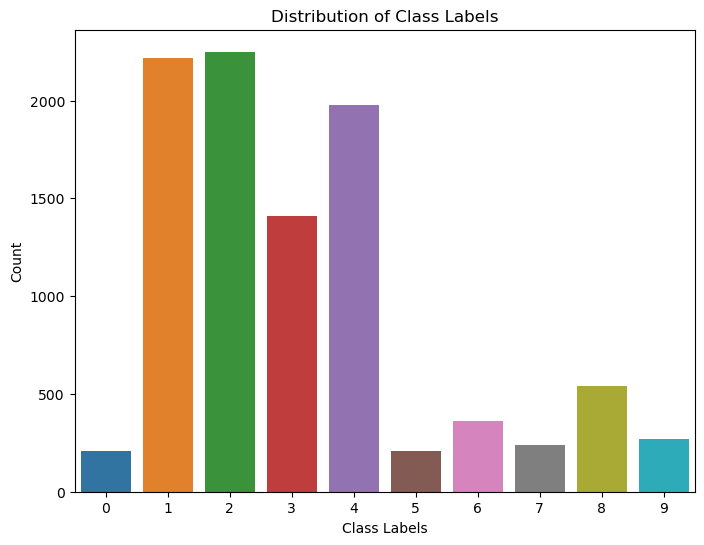

In [20]:
plt.figure(figsize=(8, 6))
sns.countplot(x='0', data=y_train)
plt.title("Distribution of Class Labels")
plt.xlabel("Class Labels")
plt.ylabel("Count")
plt.show()

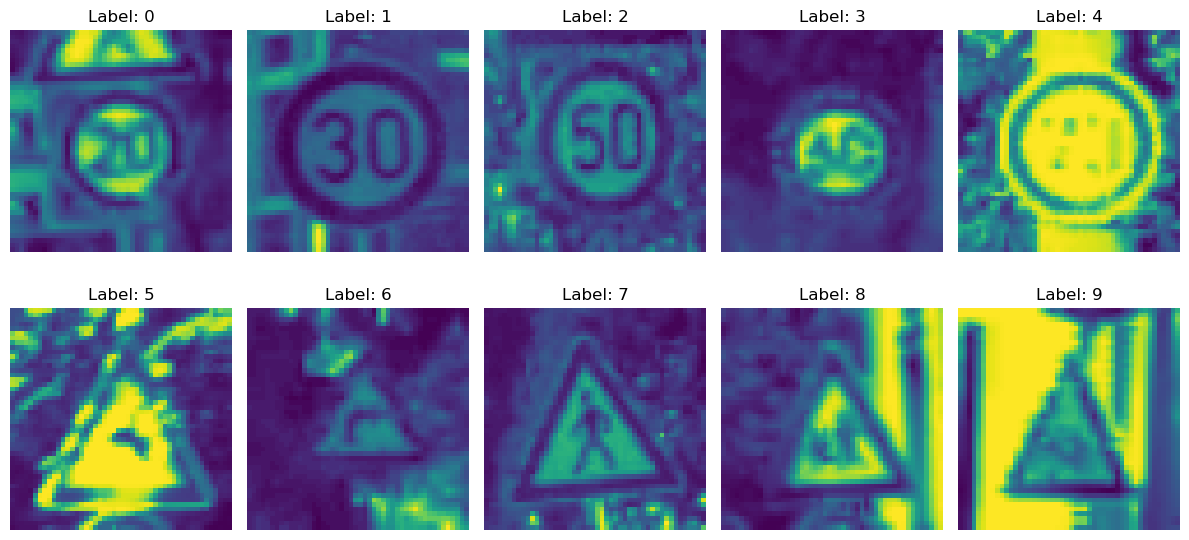

In [21]:
# To display one image for each label

# Initialize a dictionary to store one image for each label
label_images = {}

# Iterate through the rows of the DataFrames and find one image for each label
for index, row in x_train.iterrows():
    label = y_train.iloc[index, 0]  
    
    if label not in label_images:
        # Store the first image for each unique label
        label_images[label] = row.values.reshape(48, 48)  
    
    # Break the loop if we have found one image for each unique label
    if len(label_images) == 10:
        break

# Display the images
fig, axs = plt.subplots(2, 5, figsize=(12, 6))
for i, (label, image) in enumerate(label_images.items()):
    r, c = divmod(i, 5)
    axs[r, c].imshow(image)
    axs[r, c].set_title(f'Label: {label}')
    axs[r, c].axis('off')

plt.tight_layout()
plt.show()

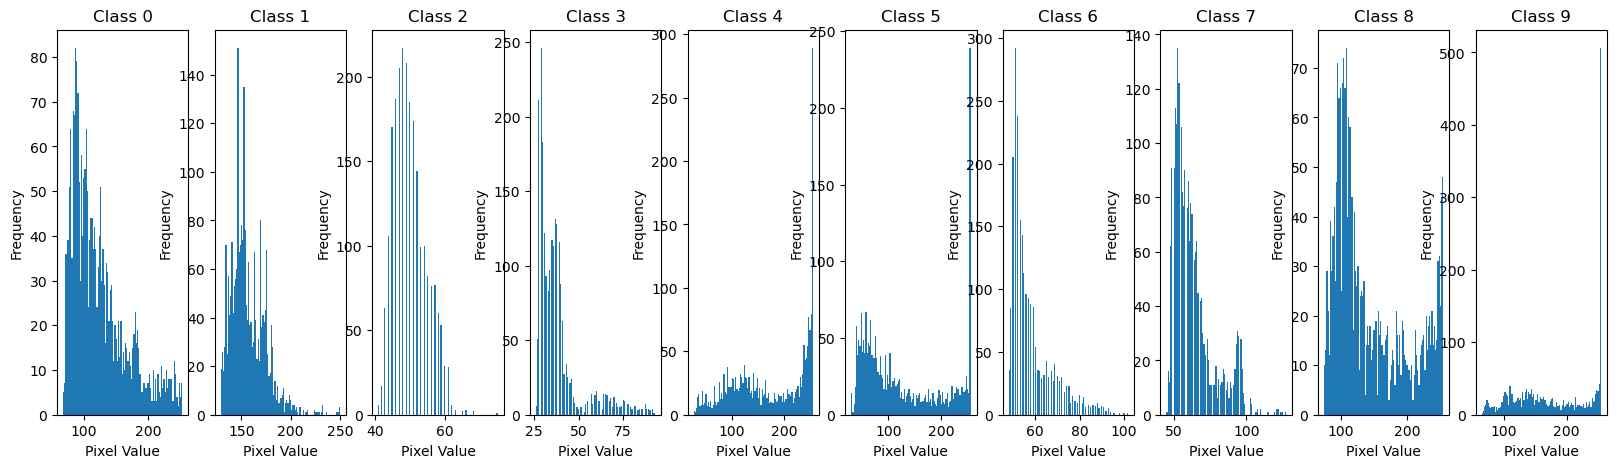

In [22]:
import matplotlib.pyplot as plt

unique_class_labels = y_train['0'].unique()

fig, axes = plt.subplots(1, len(unique_class_labels), figsize=(20, 5))

for i, class_label in enumerate(unique_class_labels):
    # Select a representative image for each class
    class_images = x_train[y_train['0'] == class_label]
    
    if not class_images.empty:
        representative_image = class_images.iloc[0, :-1].values
        
        # Plot the histogram for the representative image of each class
        axes[i].hist(representative_image, bins=100)
        axes[i].set_title(f'Class {class_label}')
        axes[i].set_xlabel("Pixel Value")
        axes[i].set_ylabel("Frequency")

plt.show()


In [23]:
# to be fixed

# # store image data for each label
# label_images = {}

# # just to check if all images are being plotted
# num_images_per_label = {}

# for index, row in x_train.iterrows():
#     label = y_train.iloc[index, 0]  
#     image_data = row.values.reshape(-1, 48, 48) 

#     if label not in label_images:
#         label_images[label] = []
    
#     # add image data to associated labels
#     label_images[label].append(image_data)

#     # just to check if all images are being plotted
#     num_images_per_label[label] = len(label_images[label])

# # get numpy array from dictionary values (image data)
# box_data = np.array(list(label_images.values()))

# # labels from keys
# labels = list(label_images.keys())

# # box plots for each label 
# plt.figure(figsize=(12, 6))
# plt.boxplot(box_data, labels=labels, vert=False)
# plt.title("Box Plots for each label")
# plt.xlabel("Pixel Values")
# plt.ylabel("Label")
# plt.show()


# # just to check if all images are being plotted
# for label, num_images in num_images_per_label.items():
#     print(f"Label {label}: {num_images} images")

### 2) Preprocessing

To be completed

### 3) Running Naïve Bayes Classifier on Train Dataset

In [24]:

from sklearn.naive_bayes import GaussianNB

x_train = np.asarray(x_train)
train_images = x_train.reshape(x_train.shape[0], -1)
y_train = np.asarray(y_train).ravel()
clf = GaussianNB()
clf.fit(train_images, y_train)

predictions = clf.predict(x_test)

"""
#Using the stratified train test split to split the data into train and test sets
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
train_images = train_images.reshape(train_images.shape[0], -1)
X_train, X_test, Y_train, Y_test = train_test_split(train_images,y_train,test_size=0.33, random_state=42)
clf2 = GaussianNB()
clf2.fit(X_train, Y_train)
predictions2 = clf2.predict(X_test)
"""

c:\Users\ishaq\anaconda3\Lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but GaussianNB was fitted without feature names
  warnings.warn(


'\n#Using the stratified train test split to split the data into train and test sets\nfrom sklearn.naive_bayes import GaussianNB\nfrom sklearn.model_selection import train_test_split\ntrain_images = train_images.reshape(train_images.shape[0], -1)\nX_train, X_test, Y_train, Y_test = train_test_split(train_images,y_train,test_size=0.33, random_state=42)\nclf2 = GaussianNB()\nclf2.fit(X_train, Y_train)\npredictions2 = clf2.predict(X_test)\n'

### 4) Evaluation Metrics for the Naïve Bayes Classifier on Dataset

In [25]:
from sklearn.metrics import classification_report

report = classification_report(y_test, predictions)

print(report)

              precision    recall  f1-score   support

           0       0.01      0.05      0.02        60
           1       0.54      0.26      0.36       720
           2       0.42      0.16      0.23       750
           3       0.30      0.16      0.21       450
           4       0.26      0.07      0.11       660
           5       0.05      0.07      0.06        60
           6       0.00      0.02      0.00        90
           7       0.04      0.32      0.07        60
           8       0.67      0.44      0.53       150
           9       0.15      0.09      0.11        90

    accuracy                           0.17      3090
   macro avg       0.24      0.16      0.17      3090
weighted avg       0.37      0.17      0.22      3090



In [26]:
from sklearn.metrics import confusion_matrix

confusion_matrix = confusion_matrix(y_test, predictions)
confusion_matrix

array([[  3,   5,  11,   4,  20,   0,   2,  12,   1,   2],
       [137, 190, 104,  44,  18,   7,  84, 129,   0,   7],
       [ 65,  47, 117,  45,  61,  27, 295,  92,   1,   0],
       [ 42,   4,   9,  74,   4,  20, 217,  71,   0,   9],
       [ 17,  35,  39,  70,  47,  17, 382,  46,   3,   4],
       [  0,   0,   0,   0,   0,   4,  30,  26,   0,   0],
       [  0,  11,   0,   0,   0,   1,   2,  57,  14,   5],
       [  0,   0,   0,   0,  30,   0,   3,  19,   1,   7],
       [  6,  21,   0,   8,   0,   2,  31,   3,  66,  13],
       [  0,  36,   0,   0,   0,   0,  10,  24,  12,   8]], dtype=int64)

In [27]:
tp = confusion_matrix.diagonal()
fn = np.sum(confusion_matrix, axis=1) - tp
fp = np.sum(confusion_matrix, axis=0) - tp
tn = np.sum(confusion_matrix) - (tp + fn + fp)

tp_rate = tp / (tp + fn)

fp_rate = fp / (fp + tn)

for class_label, tp, fp in zip(range(len(tp_rate)), tp_rate, fp_rate):
    print(f"Class {class_label}: \nTP Rate = {tp}, \nFP Rate = {fp}")

Class 0: 
TP Rate = 0.05, 
FP Rate = 0.08811881188118811
Class 1: 
TP Rate = 0.2638888888888889, 
FP Rate = 0.0670886075949367
Class 2: 
TP Rate = 0.156, 
FP Rate = 0.06965811965811966
Class 3: 
TP Rate = 0.16444444444444445, 
FP Rate = 0.06477272727272727
Class 4: 
TP Rate = 0.07121212121212121, 
FP Rate = 0.05473251028806585
Class 5: 
TP Rate = 0.06666666666666667, 
FP Rate = 0.02442244224422442
Class 6: 
TP Rate = 0.022222222222222223, 
FP Rate = 0.35133333333333333
Class 7: 
TP Rate = 0.31666666666666665, 
FP Rate = 0.15181518151815182
Class 8: 
TP Rate = 0.44, 
FP Rate = 0.010884353741496598
Class 9: 
TP Rate = 0.08888888888888889, 
FP Rate = 0.015666666666666666


In [28]:
specificity = []
unique_labels = np.unique(y_test)

for i in range(len(unique_labels)):
    true_negative = np.sum(confusion_matrix) - np.sum(confusion_matrix[i, :]) - np.sum(confusion_matrix[:, i]) + confusion_matrix[i, i]
    total_negative = np.sum(confusion_matrix) - np.sum(confusion_matrix[i, :])
    print(f'Label {unique_labels[i]} specificity: {true_negative / total_negative}')

Label 0 specificity: 0.9118811881188119
Label 1 specificity: 0.9329113924050633
Label 2 specificity: 0.9303418803418804
Label 3 specificity: 0.9352272727272727
Label 4 specificity: 0.9452674897119342
Label 5 specificity: 0.9755775577557756
Label 6 specificity: 0.6486666666666666
Label 7 specificity: 0.8481848184818482
Label 8 specificity: 0.9891156462585035
Label 9 specificity: 0.9843333333333333


In [29]:
from sklearn.metrics import recall_score

sensitivity = recall_score(y_test, predictions, average=None)
for i in range(len(unique_labels)):
    print(f'Label {unique_labels[i]} sensitivity: {sensitivity[i]}')

Label 0 sensitivity: 0.05
Label 1 sensitivity: 0.2638888888888889
Label 2 sensitivity: 0.156
Label 3 sensitivity: 0.16444444444444445
Label 4 sensitivity: 0.07121212121212121
Label 5 sensitivity: 0.06666666666666667
Label 6 sensitivity: 0.022222222222222223
Label 7 sensitivity: 0.31666666666666665
Label 8 sensitivity: 0.44
Label 9 sensitivity: 0.08888888888888889


c:\Users\ishaq\anaconda3\Lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but GaussianNB was fitted without feature names
  warnings.warn(


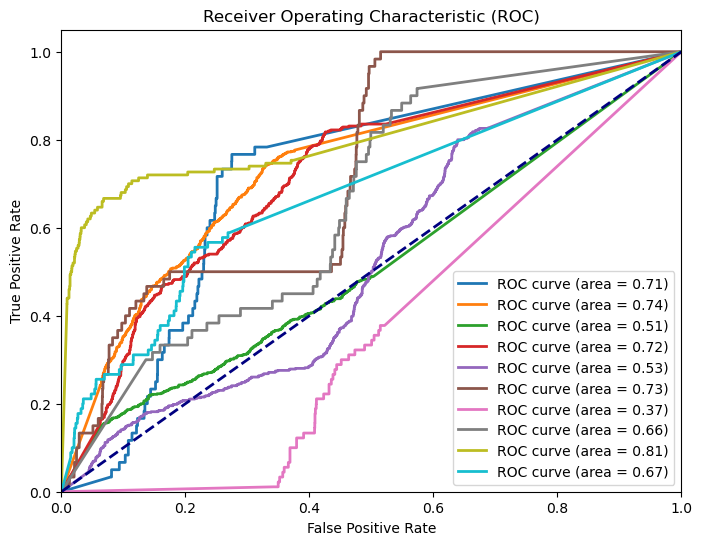

In [30]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
def plot_roc_curves(probabilities,  y_test, unique_labels):
    roc_auc_scores = []
    plt.figure(figsize=(8, 6))

    for i in range(len(unique_labels)):
        fpr, tpr, _ = roc_curve((y_test == unique_labels[i]).astype(int), probabilities[:, i])
        roc_auc = auc(fpr, tpr)
        roc_auc_scores.append(roc_auc)
        plt.plot(fpr, tpr, lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))

    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC)')
    plt.legend(loc='lower right')
    plt.show()
    
probabilities = clf.predict_proba(x_test)
plot_roc_curves(probabilities, y_test, unique_labels)

#### Evaluation Using Cross-Validation

In [31]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(clf, x_train, y_train, scoring="accuracy", cv=10)
scores

array([0.23323013, 0.21052632, 0.24355005, 0.19298246, 0.17027864,
       0.10216718, 0.14757482, 0.25696594, 0.11455108, 0.19401445])

In [32]:
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

display_scores(scores)

Scores: [0.23323013 0.21052632 0.24355005 0.19298246 0.17027864 0.10216718
 0.14757482 0.25696594 0.11455108 0.19401445]
Mean: 0.1865841073271414
Standard deviation: 0.05014630428306487


In [33]:
scores = cross_val_score(clf, x_train, y_train, scoring="neg_mean_squared_error", cv=10)

clf_rmse_scores = np.sqrt(-scores)

display_scores(clf_rmse_scores)

Scores: [2.80644989 2.9619186  2.60625587 2.50366089 2.53947168 3.23997223
 2.99569695 3.07558715 3.01629561 2.94724863]
Mean: 2.8692557504560754
Standard deviation: 0.23405371006915723


### 5) Top Correlating Features - Feature Selection

In [34]:
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier

no_of_features_per_class = [5, 10, 20]
top_features_per_cd = {}

x_train_class_vs_rest = pd.DataFrame(x_train)

for class_label in range(10):  
    onevrsall_path = os.path.join("OnevrsAll", f"{class_label}_vrs_all")
    y_train_path = os.path.join(onevrsall_path, f"y_train_{class_label}.csv")
    y_train_class_vs_rest = pd.read_csv(y_train_path)
    
    top_features_per_class = {}
    # Train a logistic regression classifier for the current one-vs-rest classification task
    classifier = OneVsRestClassifier(LogisticRegression())
    classifier.fit(x_train_class_vs_rest, y_train_class_vs_rest)
    
    # Get the coefficients (weights) for the features
    feature_weights = classifier.estimators_[0].coef_[0]
    # Sort the features by their absolute weights and select the top features
    for no_f in no_of_features_per_class:
        top_feature_indices = np.argsort(np.abs(feature_weights))[::-1][:no_f]
        top_features = x_train_class_vs_rest.columns[top_feature_indices]
        top_features_per_class[no_f] = top_features.tolist()
    
    # Store the top features for the current class
    top_features_per_cd[class_label] = top_features_per_class

# Create the final datasets with selected features
final_datasets = {}
for no_f in no_of_features_per_class:
    dataset_name = f"Data set {no_f}"
    
    # Combine selected features for all classes
    selected_features = []
    for class_label, top_features in top_features_per_cd.items():
        selected_features.extend(top_features[no_f])
    
    # Create the final dataset with selected features
    final_datasets[dataset_name] = x_train_class_vs_rest[selected_features]

c:\Users\ishaq\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\ishaq\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

In [35]:
dataset1 = final_datasets['Data set 5']
dataset2 = final_datasets['Data set 10']
dataset3 = final_datasets['Data set 20']

In [36]:
import pandas as pd
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.model_selection import cross_val_score
import numpy as np

class_labels = list(range(10))

def evaluate_multinomial_nb(X_train, X_test, y_train, y_test):
    nb_model = MultinomialNB()
    nb_model.fit(X_train, y_train)
    y_pred = nb_model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred)
    cross_val_scores = cross_val_score(nb_model, X_train, y_train, scoring="accuracy", cv=10)
    return accuracy, precision, recall, f1, roc_auc, cross_val_scores

datasets = [dataset1, dataset2, dataset3]  
y_train_dict = {}
y_test_dict = {}
evaluation_metrics = []
dataset_number_features = [5, 10, 20]

for dataset_number, dataset in enumerate(datasets):
    X_train_fr = dataset
    x_test_int = x_test.astype('int64')
    x_test_int.columns = x_test_int.columns.astype('int64')
    X_test_fr = pd.DataFrame(x_test_int[dataset.columns], columns=dataset.columns)
    
    for class_label in class_labels:
        onevrsall_path = os.path.join("OnevrsAll", f"{class_label}_vrs_all")
        y_train_file = os.path.join(onevrsall_path, f"y_train_{class_label}.csv")
        y_test_file = os.path.join(onevrsall_path, f"y_test_{class_label}.csv")
        y_train_df = pd.read_csv(y_train_file).values.ravel()
        y_test_df = pd.read_csv(y_test_file).values.ravel()
    
        accuracy, precision, recall, f1, roc_auc, cross_val_scores = evaluate_multinomial_nb(X_train_fr, X_test_fr, y_train_df, y_test_df)

        evaluation_metrics.append({
            "Dataset": str(dataset_number_features[dataset_number]),
            "Class Label": class_label,
            "Accuracy": accuracy,
            "Precision": precision,
            "Recall": recall,
            "F1 Score": f1,
            "ROC AUC": roc_auc,
            "Cross Val Scores": np.mean(cross_val_scores) 
        })

df_evaluation_metrics = pd.DataFrame(evaluation_metrics)

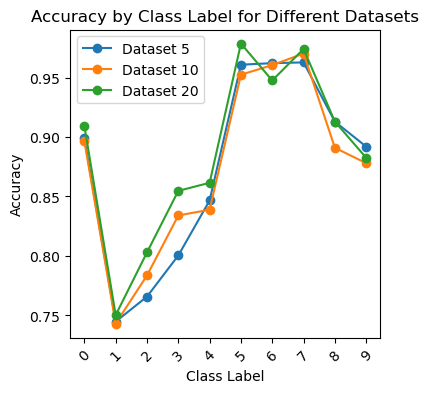

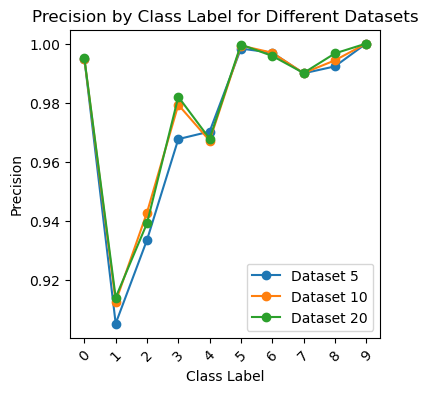

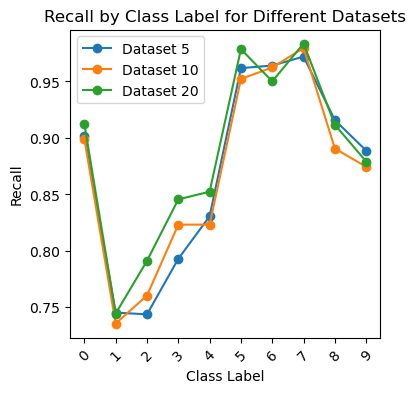

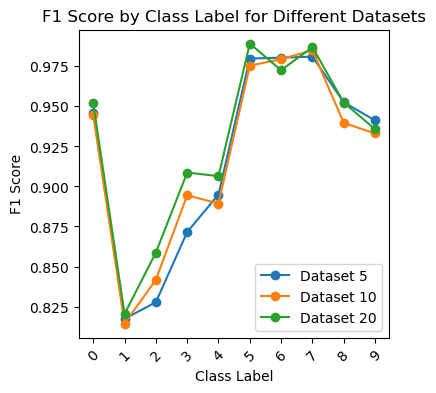

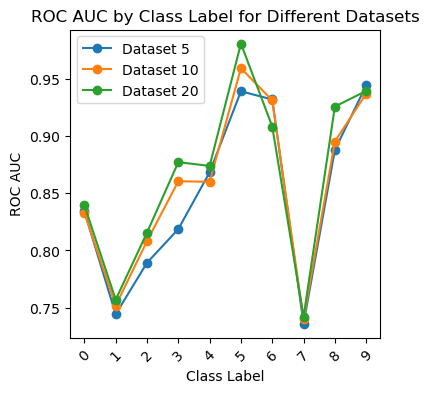

In [37]:
import pandas as pd
import matplotlib.pyplot as plt

metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score', 'ROC AUC']

for metric in metrics:
    plt.figure(figsize=(4, 4)) 
    for dataset_number in [5, 10, 20]:
        dataset_metrics = df_evaluation_metrics[df_evaluation_metrics['Dataset'] == str(dataset_number)]
        x_values = dataset_metrics['Class Label']
        y_values = dataset_metrics[metric]
        plt.plot(x_values, y_values, marker='o', label=f'Dataset {dataset_number}')

    plt.title(f'{metric} by Class Label for Different Datasets')
    plt.xlabel('Class Label')
    plt.ylabel(metric)
    plt.legend()
    plt.xticks(x_values)  
    plt.xticks(rotation=45)
    plt.show()


In [38]:
df_evaluation_metrics

,Dataset,Class Label,Accuracy,Precision,Recall,F1 Score,ROC AUC,Cross Val Scores
0,5,0,0.899029,0.994902,0.901650,0.945983,0.834158,0.894014
1,5,1,0.744660,0.905177,0.745148,0.817403,0.744102,0.731785
2,5,2,0.765696,0.933476,0.743590,0.827783,0.789128,0.687926
3,5,3,0.800324,0.967638,0.792803,0.871539,0.818624,0.770485
4,5,4,0.846602,0.970192,0.830453,0.894900,0.868257,0.835913
5,5,5,0.960841,0.998287,0.961716,0.979660,0.939191,0.944892
6,5,6,0.962136,0.996898,0.964000,0.980173,0.932000,0.934778
7,5,7,0.962783,0.989916,0.971947,0.980849,0.735974,0.958308
8,5,8,0.912945,0.992259,0.915646,0.952415,0.887823,0.911558
9,5,9,0.891909,1.000000,0.888667,0.941052,0.944333,0.877915
